# <span style="color:firebrick"> Esercitazione 1 </span>

### <span style="color:firebrick"> Esercizio 1.1 </span>  
<font color="red">Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

<font color="red"> 1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, (see below: Computing statistical uncertainties).  $N$</font>

<font color="red"> 2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). </font>

Per calcolare l'integrale e la varianza sono stati generati numeri pseudo-casuali uniformemente distribuiti nell’intervallo $[0,1)$. Per stimarne il valore medio e l'errore è stato utilizzato il **metodo del data blocking**, con $M=10^4$ lanci suddivisi in $N=100$ blocchi.

Nei grafici è riportato l’andamento delle medie progressive, con le relative incertezze, in funzione del numero di blocchi. Si osserva che, al crescere del numero di blocchi, il valore medio converge al valore atteso e l'errore diminuisce fino a stabilizzarsi a un certo valore.
 

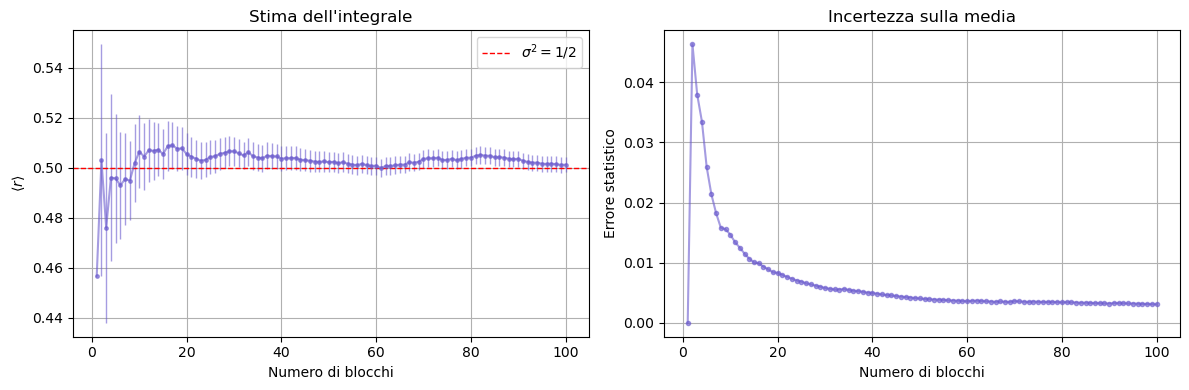

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data = np.loadtxt("output.txt")
blk = data[:, 0]
media = data[:, 1]
err = data[:, 2]

# Crea figura con due pannelli affiancati
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Primo grafico: stima della varianza ---
axes[0].errorbar(blk, media, yerr=err, fmt='.-', alpha=0.6, color='slateblue',markersize=5, elinewidth=1)
axes[0].axhline(y=1/2, color='red', linestyle='--', linewidth=1, label=r"$\sigma^2 = 1/2$")
axes[0].set_xlabel("Numero di blocchi")
axes[0].set_ylabel(r"$\langle r \rangle$")
axes[0].set_title("Stima dell'integrale")
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico: incertezza statistica ---
axes[1].plot(blk, err, '.-', color='slateblue',alpha=0.6)
axes[1].set_xlabel("Numero di blocchi")
axes[1].set_ylabel("Errore statistico")
axes[1].set_title("Incertezza sulla media")
axes[1].grid(True)

plt.tight_layout()
plt.show()


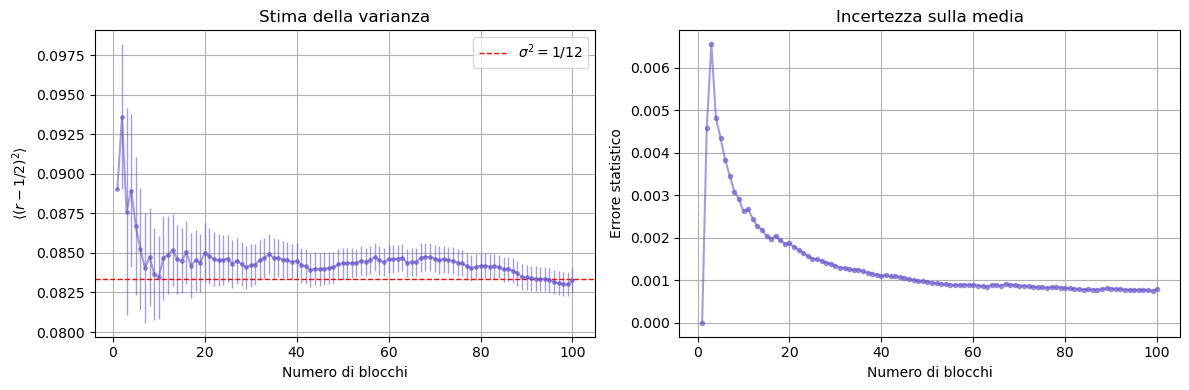

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data = np.loadtxt("output_v.txt")
blk = data[:, 0]
media = data[:, 1]
err = data[:, 2]

# Crea figura con due pannelli affiancati
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Primo grafico: stima della varianza ---
axes[0].errorbar(
    blk, media, yerr=err,
    fmt='.-', alpha=0.6, color='slateblue',
    markersize=5, elinewidth=1
)
axes[0].axhline(y=1/12, color='red', linestyle='--', linewidth=1,
                label=r"$\sigma^2 = 1/12$")
axes[0].set_xlabel("Numero di blocchi")
axes[0].set_ylabel(r"$\langle (r-1/2)^2 \rangle$")
axes[0].set_title("Stima della varianza")
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico: incertezza statistica ---
axes[1].plot(blk, err, '.-', color='slateblue',alpha=0.6)
axes[1].set_xlabel("Numero di blocchi")
axes[1].set_ylabel("Errore statistico")
axes[1].set_title("Incertezza sulla media")
axes[1].grid(True)

plt.tight_layout()
plt.show()


<font color="red"> The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

<font color="red"> 3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>). </font>

Per verificare che il generatore di numeri casuali segua veramente una distribuzione uniforme nell’intervallo $[0,1)$ è stato implementato il test del $\chi^2$.
In ciascun test vengono generati $N=10^4$ numeri casuali, suddividendo l’intervallo $[0,1)$ in $N_{\text{bins}}=100$ sottointervalli di uguale ampiezza. Il numero di eventi osservati in ciascun bin $O_i$ viene confrontato con il valore atteso
$$
E_i = \frac{N}{N_{\text{bins}}}.
$$

Il valore del $\chi^2$ è calcolato secondo la formula
$$
\chi^2 = \sum_{i=1}^{M} \frac{(O_i - E_i)^2}{E_i}.
$$

Il test viene ripetuto $N_{\text{att}}=500$ volte, ciascuna con una nuova sequenza di numeri casuali, ottenendo una distribuzione dei valori di $\chi^2$. Per un generatore ideale ci si aspetta che tali valori fluttuino attorno al valore medio teorico pari al numero di gradi di libertà $\nu = N_{\text{bins}} - 1$.


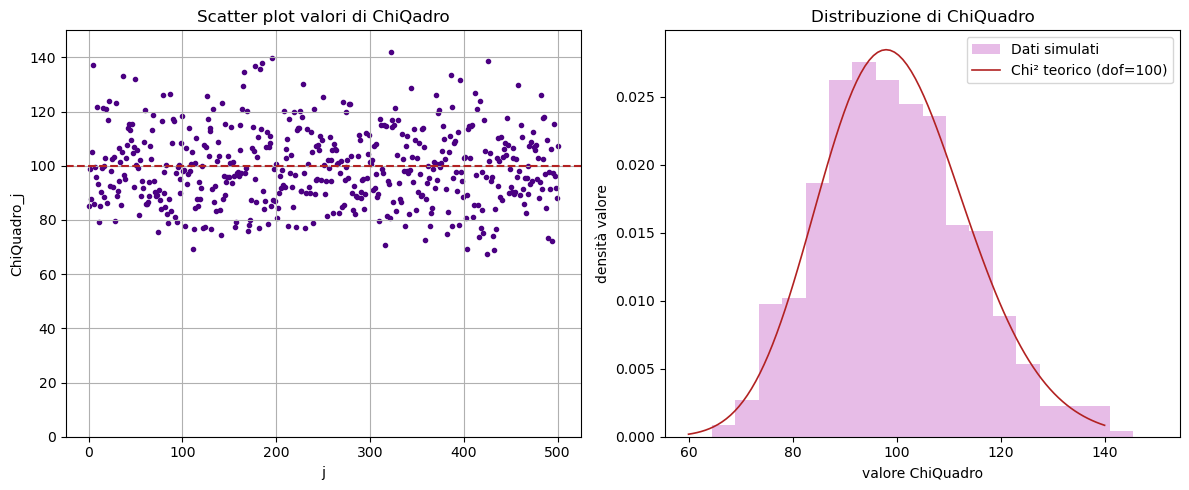

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2 

# Carica i dati
data = np.loadtxt("output_ChiQuadro.txt")  
indice = data[:, 0]   # Prima colonna 
ChiQuadro = data[:, 1]  # Seconda colonna 

# Crea il plot
plt.figure(figsize=(12, 5))

# scatter plot dei valori di Chi Quadro
plt.subplot(1, 2, 1)
plt.scatter(indice, ChiQuadro, marker=".", color="indigo")  

plt.ylim(0, 150)
plt.axhline(y=100, color="firebrick", linestyle="--")

plt.xlabel("j")
plt.ylabel("ChiQuadro_j")
plt.title("Scatter plot valori di ChiQadro")
plt.grid(True)

# Istogramma della distribuzione di Chi Quadro
plt.subplot(1, 2, 2)
plt.hist(ChiQuadro, bins=20, density=True, alpha=0.7, color='plum', range=(60, 150), label="Dati simulati")

# distribuzione teorica chi^2 con 100 dof
x = np.linspace(60, 140, 100) # Genera 100 punti equispaziati nell'intervallo [60,150]
pdf = chi2.pdf(x, df=100)  # Calcola la funzione di densità di probabilità (pdf) del χ² con 100 gradi di libertà, nei punti definiti da x
plt.plot(x, pdf, "firebrick", lw=1.2 , label="Chi² teorico (dof=100)") # Plotta la curva della distribuzione teorica in rosso


plt.title("Distribuzione di ChiQuadro")
plt.xlabel("valore ChiQuadro")
plt.ylabel("densità valore")
plt.legend()


plt.tight_layout()
plt.show()


### <span style="color:firebrick"> Esercizio 1.2 </span>  
<font color="red"> - Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem: </font>

<font color="red"> 1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.</font>


Data una distribizione di probabilità monodimensionale $p(x)$ definita su $-\infty<x<\infty$, la **funzione di distribuzione cumulativa** $F(x)$ è definita come $$F(x)=\int_{-\infty}^xp(x')dx'$$ Valgono $ \lim_{x\to -\infty}F(x)=0$, $ \lim_{x\to\infty}F(x)=1$, $\frac{dF(x)}{dx}=p(x)\geq 0$.

Per campionare distribuzioni di probabilità esistono diversi metodi, uno di questi è il **metodo dell'inversa della cumulativa**. Sia $x$ una variabile random con cumulativa $F_x(x)$ e distribuzione di probabilità $p_x(x)=\frac{dF_x(x)}{dx}$. Sia $y=y(x)$ una funzione non decrescente di $x$, dunque $p[y(x_1)<y(x_2)]=p[x_1<x_2]$, da cui $F_y(y)=F_x(x)$, quindi $p_y(y)\frac{dy}{dx}=p_x(x)$; analogamente per una funzione decrescente si trova $p_y(y)\frac{dy}{dx}=-p_x(x)$. Combinando ii risultati si ottiene: $$p_y(y)=p_x(x)\left|\frac{dy(x)}{dx}\right|^{-1}$$ 

A questo punto si considera $y=F_x(x)$, i.e. $y(x)$ è la cumulativa. Si osserva che la distribuzione di probabilità $p_y(y)$ che caratterizza $y$ è: $$p_y(y)=p_x(x)\left|\frac{dF_x(x)}{dx}\right|^{-1}=p_x(x)(p_x(x))^{-1}=1 \hspace{2cm} 0\leq y\leq 1$$ da cui si evince che, se $F_x(x)$ è nota e invertibile analiticamente $$x=F^{-1}_x(y)$$ dove $y$ è un numero casuale distribuito uniformemente tra $0$ e $1$ e $x$ è la variabile random che segue la distribuzione di probabilità desiderata. 
Spesso non è possibile calcolare analiticamente l'inversa della cumulativa di una distribuzione di probabilità, un esempio è proprio la Gaussiana, in questi casi bisogna ricorrere ad altre tecniche di campionamento.

Si aggiungono al RNG le due distribuzioni di probabilità:
- **Distribuzione Esponenziale** campionata tramite il metodo dell'inversa della cumulativa $$p_x(x)=\lambda \exp(-\lambda x) \hspace{0.5cm} 0\leq x<\infty \hspace{0.5cm} \Rightarrow \hspace{0.5cm} x=-\frac{1}{\lambda}\ln{(1-y)}$$
- **Distribuzione di Cauchy-Lorentz** campionata tramite il metodo dell'inversa della cumulativa $$p_x(x)=\frac{1}{\pi}\frac{\Gamma}{\Gamma^2+(x-\mu)^2} \hspace{0.5cm} -\infty < x<\infty \hspace{0.5cm} \Rightarrow \hspace{0.5cm} x=\mu + \Gamma \tan{\left[\pi\left(y-\frac{1}{2}\right)\right]}$$


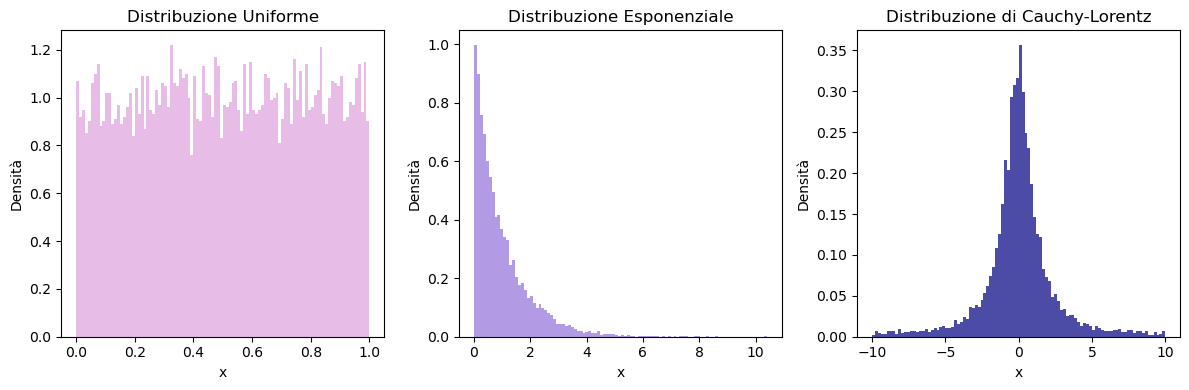

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dal file
data = np.loadtxt("output_r.txt") 

# Estrai le colonne
un_data = data[:, 1]
exp_data = data[:, 2] 
cl_data = data[:, 3]   

# Crea il plot
plt.figure(figsize=(12, 4))

# Istogramma della distribuzione uniforme
plt.subplot(1, 3, 1)
plt.hist(un_data, bins=100, density=True, alpha=0.7, color='plum')
plt.title("Distribuzione Uniforme")
plt.xlabel("x")
plt.ylabel("Densità")

# Istogramma della distribuzione esponenziale
plt.subplot(1, 3, 2)
plt.hist(exp_data, bins=100, density=True, alpha=0.7, color='mediumpurple')
plt.title("Distribuzione Esponenziale")
plt.xlabel("x")
plt.ylabel("Densità")

# Istogramma della distribuzione di Cauchy-Lorentz
plt.subplot(1, 3, 3)
plt.hist(cl_data, bins=100, density=True, alpha=0.7, color='navy', range=(-10, 10))
plt.title("Distribuzione di Cauchy-Lorentz")
plt.xlabel("x")
plt.ylabel("Densità")

plt.tight_layout()
plt.show()


<font color="red"> 2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).
Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case. </font>

L'esercizio è una conferma del teorema del limite centrale

**Teorema del Limite Centrale**: Si considerino $N$ variabili statisticamente indipendenti e identicamente distribuite $x_1, \dots ,x_N$ i.e., $p_N(x_1, \dots ,x_N)=p(x_1)\dots p(x_N)$ e si richiede che:
- $\langle x_1 \rangle = \dots=\langle x_N \rangle=\mu$
- $\langle x_1^2 \rangle - \langle x_1 \rangle^2 = \dots=\langle x_N^2 \rangle - \langle x_N \rangle^2 =\sigma^2<\infty$

Si definisce $A_N=\frac{1}{N} \sum_{n=1}^{N}x_n$ ($S_N= \sum_{n=1}^{N}x_n$) e seguono le seguenti affermazioni:

1. $\langle A_N \rangle = \mu$ (analogamente $\langle S_N \rangle = N\mu$ )
2. $\sigma^2_{A_N}=\frac{\sigma^2}{N}$ (analogamente $\sigma^2_{S_N}=N\sigma^2$ )
3. $P_N(A_N)\stackrel{N \to \infty}{\longrightarrow} \frac{1}{\sqrt{2\pi\sigma^2_{A_N}}} \exp\!\left(-\frac{(A_N-\mu)^2}{2\sigma^2_{A_N}}\right)$

Di conseguenza, qualsiasi sia la distribuzione di probabilità di partenza delle variaibili random, asintoticamente la variabile media segue una distribuzione Gaussiana, a patto che i primi due momenti esistano. 

La distribuzione uniforme e la distribuzione esponenziale soddisfano le ipotesi del teorema, infatti si osserva che per $N=100$, la distribuzione somma è una Gaussiana. Inoltre dal fit si verifica che, per la distribuzione uniforme (esponenziale) il valore medio tende a proprio a $\mu=0.5$ ($=1$). La Cauchy-Lorentz invece ha varianza infinita, per questo non soddisfa le ipotesi del CLT. D'altra parte la Cauchy-Lorentz è, a meno di fattori di scala, una distribuzione invariante sotto convoluzione, detta **stabile**, di conseguenza la distribuzione $A_N$ ($S_N$) ottenuta sommando variabili random identicamente distribuite secondo una Lorentziana, tende proprio a una Lorentziana

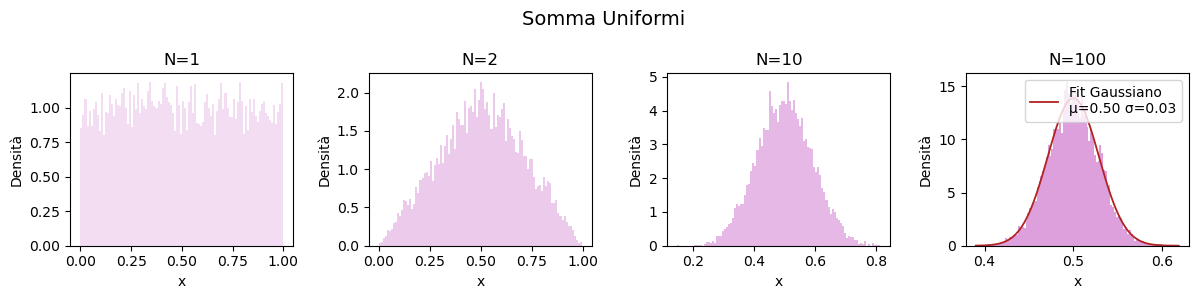

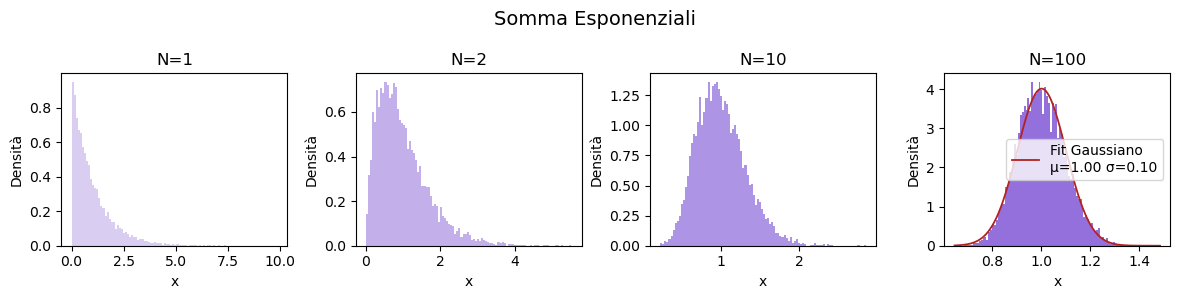

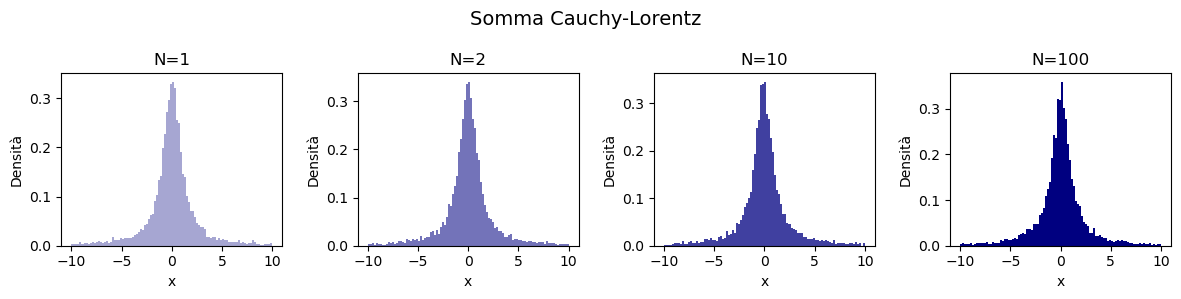

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

files = ["output_S_N1.txt","output_S_N2.txt","output_S_N10.txt","output_S_N100.txt"]
labels = ["N=1","N=2","N=10","N=100"]
data = [np.loadtxt(f) for f in files]

U = [d[:,0] for d in data]   # Uniformi
E = [d[:,1] for d in data]   # Esponenziali
C = [d[:,2] for d in data]   # Cauchy

# alpha crescente (N piccolo = più trasparente)
alphas = [0.35, 0.55, 0.75, 1.00]   # modificabili a tuo gusto


# ================================
# FUNZIONE PER PLOTTARE UNA SERIE
# ================================

def plot_distr(dataset, color, title, fit=False, ranges=None):
    plt.figure(figsize=(12,3))

    for i, x in enumerate(dataset):
        plt.subplot(1,4,i+1)
        plt.hist(x, bins=100, density=True, alpha=alphas[i], color=color, range=ranges)
        plt.title(labels[i]); plt.xlabel("x"); plt.ylabel("Densità")

        if fit and i == 3:  # fit solo per N=100
            mu, sigma = norm.fit(x)
            xmin, xmax = plt.xlim()
            xx = np.linspace(xmin, xmax, 300)
            pdf = norm.pdf(xx, mu, sigma)
            plt.plot(xx, pdf, color='firebrick', linewidth=1.3,label=f"Fit Gaussiano\nμ={mu:.2f} σ={sigma:.2f}")
            plt.legend()

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


# ================================
# PLOT FINALI — 1 colore per distribuzione
# ================================

plot_distr(U, color="plum", title="Somma Uniformi", fit=True)
plot_distr(E, color="mediumpurple", title="Somma Esponenziali", fit=True)
plot_distr(C, color="navy", title="Somma Cauchy-Lorentz", ranges=(-10,10))


### <span style="color:firebrick"> Esercizio 1.3</span>  
<font color="red"> - **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$. </font>

Per calcolare il valore medio richiesto si utilizza ancora il metodo del data blocking, con $N$ blocchi, ciascuno composto da $L = M/N$ lanci, dove $M$ è il numero totale di lanci.
Per ogni lancio vengono estratti:
- la coordinata $y$ del centro dell’ago, distribuita uniformemente nell’intervallo $[0, d \cdot n_{\text{Lines}})$;
- l’angolo $\theta$ tra l’ago e le rette. Per la generazione dell’angolo casuale è stata aggiunta al RG la funzione `Angle()`, che genera un angolo casuale $\alpha$ con distribuzione uniforme nell’intervallo $[0,\pi)$.
Il metodo si basa sull’estrazione uniforme di punti all’interno del cerchio unitario tramite una tecnica di rigetto: vengono generati due numeri casuali $x$ e $y$ uniformemente distribuiti in $[-1,1]$ e si accetta la coppia solo se vale $x^2 + y^2 < 1$. Una volta accettato il punto $(x,y)$, l’angolo $\alpha$ viene calcolato come
$$
\alpha = \arccos\!\left(\frac{x}{\sqrt{x^2+y^2}}\right).
$$
Poiché la distribuzione dei punti nel disco è isotropa, l’angolo così ottenuto è uniformemente distribuito. Il valore restituito è compreso tra $0$ e $\pi$ (nell’esperimento di Buffon gli angoli $\theta$ e $\pi-\theta$ sono equivalenti).


Un’intersezione tra l’ago e una delle rette si verifica quando almeno una delle estremità dell’ago oltrepassa i confini della striscia in cui cade il centro. Indicando con $k$ l’indice della riga, la condizione di intersezione è
$$
y + \frac{L_{\text{ago}}}{2}\sin\theta > d(k+1)
\quad \text{oppure} \quad
y - \frac{L_{\text{ago}}}{2}\sin\theta < dk.
$$

Il numero di intersezioni $N_{\text{hit}}$ viene utilizzato per stimare $\pi$ tramite la relazione
$$
\pi \simeq \frac{2 L_{\text{ago}} L}{N_{\text{hit}} d}.
$$

I valori della media progressiva e dell’errore associato sono infine salvati su file.

**Parametri utilizzati**
- $M = 10^5$ numero totale di lanci
- $N = 100$ numero di blocchi
- $L_{\text{ago}} = 0.34$ lunghezza dell’ago
- $d = 1$ distanza tra le rette
- $n_{\text{Lines}} = 10$ numero di rette parallele


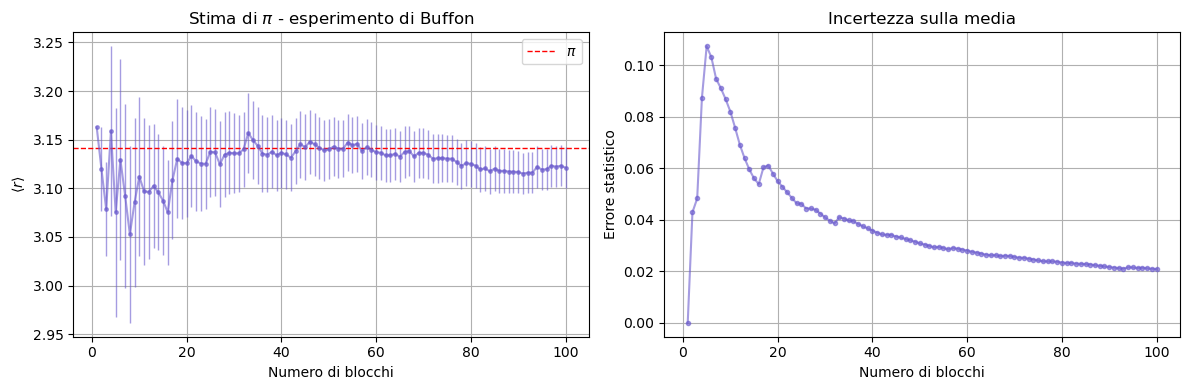

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data = np.loadtxt("output_Buffon.txt")
blk = data[:, 0]
media = data[:, 1]
err = data[:, 2]

# Crea figura con due pannelli affiancati
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Primo grafico: stima della varianza ---
axes[0].errorbar(
    blk, media, yerr=err,
    fmt='.-', alpha=0.6, color='slateblue',
    markersize=5, elinewidth=1
)
axes[0].axhline(y=np.pi, color='red', linestyle='--', linewidth=1,
                label=r"$\pi$")
axes[0].set_xlabel("Numero di blocchi")
axes[0].set_ylabel(r"$\langle r \rangle$")
axes[0].set_title("Stima di $\pi$ - esperimento di Buffon")
axes[0].grid(True)
axes[0].legend()

# --- Secondo grafico: incertezza statistica ---
axes[1].plot(blk, err, '.-', color='slateblue',alpha=0.6)
axes[1].set_xlabel("Numero di blocchi")
axes[1].set_ylabel("Errore statistico")
axes[1].set_title("Incertezza sulla media")
axes[1].grid(True)

plt.tight_layout()
plt.show()


### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?